Importamos nuestras librerías para comenzar a analizar el dataset

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns


Cargamos el dataset a un dataframe mediante pandas

In [166]:
df = pd.read_csv('gender_classification.csv')

Observamos los datos de nuestro dataset podemos observar que las muestras tiene varios atributos binarios y otros atributos de tipo real, al igual que el género se podría definir como atributo binario

In [167]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1368a38e90>,
      dtype=object)

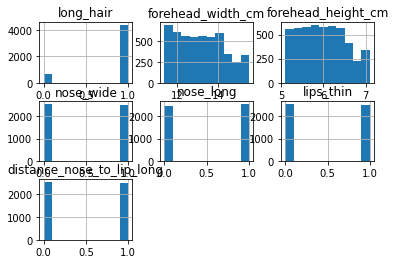

In [168]:
df.hist()

Hacemos una verificación acerca de datos faltantes




In [169]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Graficamos un histograma de algunos datos binarios con los datos reales observamos que existe una gran diferencia sobre el rango de estos atributos

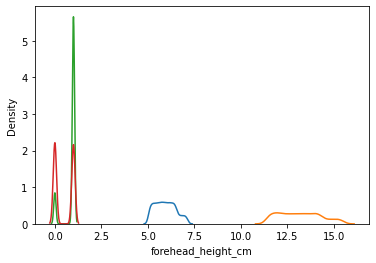

In [170]:
sns.kdeplot(df['forehead_height_cm'])
sns.kdeplot(df['forehead_width_cm'])
sns.kdeplot(df['long_hair'])
sns.kdeplot(df['nose_wide'])

In [171]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Mapeamos los datos para 1 y 0 respecto a las muestras con etiquetas masculinas y femeninas

In [172]:
df['gender']=df['gender'].map({'Female': 1, 'Male': 0})

Normalizamos los datos para las columnas de numeros reales con el propósito de mantener todos los datos entre un rango de 0 a 1 y lograr mejores resultados

In [173]:
scaler = preprocessing.MinMaxScaler()
df[['forehead_height_cm','forehead_width_cm']] = scaler.fit_transform(df[['forehead_height_cm','forehead_width_cm']])

In [174]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,0.434508,0.423155,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,0.270031,0.270634,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.195122,0.200000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.414634,0.400000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,0.634146,0.650000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Se divide el dataframe en muestras etiquetadas y muestras con características

In [175]:
dfX = df.iloc [:,:-1]
dfY = df.iloc [:,-1]

Se dividen los datos de una forma aleatoria el dataset en 70 % para entrenamiento, 20 % para validación y 10 % para testing

In [176]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dfX, dfY, test_size=0.3)
Xvalidate, Xtest, Yvalidate, Ytest = train_test_split(Xtest, Ytest, test_size=0.33)

También escribimos los datos para nuestra comodidad al momento de probar los diferentes modelos

In [177]:
Xtrain.to_csv('xtrain.csv', index = False, header=True)
Ytrain.to_csv('ytrain.csv', index = False, header=True)
Xtest.to_csv('xtest.csv', index = False, header=True)
Ytest.to_csv('ytest.csv', index = False, header=True)
Xvalidate.to_csv('xvalidate.csv', index = False, header=True)
Yvalidate.to_csv('yvalidate.csv', index = False, header=True)

Este paso nos sirve para poder convertir los dataframes en pandas-arrays 

In [178]:
Xtrain = Xtrain.values
Ytrain = Ytrain.values
Xtest = Xtest.values
Ytest = Ytest.values
Xvalidate = Xvalidate.values
Yvalidate = Yvalidate.values

In [179]:
Ytrain = Ytrain.reshape(Xtrain.shape[0], 1)
Ytest = Ytest.reshape(Xtest.shape[0],1)
Yvalidate = Yvalidate.reshape(Xvalidate.shape[0],1)

# **Regresión Logística**

Despues de haber pre procesado nuestros datos empezamos resolviendo el modelo de regresión logística. Para esto definimos nuestra predicción a través de la función sigmoide. El objetivo es poder reducir el error de predicción. Para esto se define nuestra función costo de error de la siguiente forma:

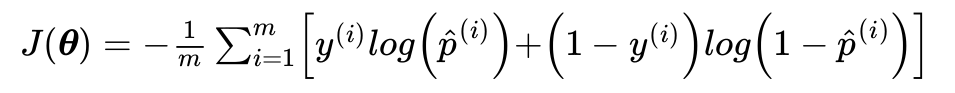

Donde "m" es el número de muestras, "y" es una etiqueta con subíndice "i", "p" es la función predicción en base a la muestra con subíndice "i". A esta función se le conoce como función logarítmica de pérdida.

In [180]:
def sigmoid(x):
  return 1/(1+np.exp(-x)) 

Luego para nuestro algoritmo podemos resolver la optimización del costo tratando con derivadas parciales respecto a los pesos y actualizando estos mismos con el resultado de sus derivadas, es decir, utilizamos el algoritmo de gradiente descendiente.

In [181]:
def train(X_train, Y_train, X_test, Y_test, learning_rate, iterations):
  observations = X_train.shape[0]
  features = X_train.shape[1]
  observationsT = X_test.shape[0]
  
  W = np.zeros((1, features))
  B = 0
  costs = []
  costsT = []

  for i in range(iterations):
    Z = np.dot(X_train, W.T) + B
    zT = np.dot(X_test, W.T) + B
    predictions = sigmoid(Z) 
    predictionsT = sigmoid(zT)

    costT = -(1 / observationsT)*np.sum(Y_test*np.log(predictionsT) + (1-Y_test)*np.log(1-predictionsT)) 
    cost = -(1 / observations)*np.sum(Y_train*np.log(predictions) + (1-Y_train)*np.log(1-predictions))
    
    dW = (1/features)*np.dot(X_train.T, predictions-Y_train)
    dB = (1/features)*np.sum(predictions - Y_train)

    W = W - learning_rate*dW.T
    B = B - learning_rate*dB

    costs.append(cost)
    costsT.append(costT)

  return W, B, costs, costsT


Definimos nuestros hiperparámetros como el número de iteraciones así como el *learning_rate* 

In [182]:
iterations = 200

learning_rate = 0.001

W, B, costs, costsT = train(Xtrain, Ytrain, Xtest, Ytest, learning_rate, iterations)

Graficamos el costo de error en el dataset de entrenamiento y en el dataset de test donde observamos que no existe un overfitting ni un underfitting con respecto al modelo entrenado. 

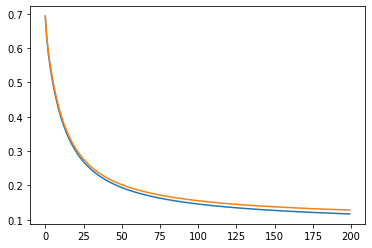

In [183]:
plt.plot(costs)
plt.plot(costsT)
plt.show()

Ahora validaremos nuestro modelo con el validation dataset

In [186]:
Y_predictions  = []
for i in range(Yvalidate.shape[0]):
  Z = np.dot(Xvalidate[i], W.T) + B
  if ( sigmoid(Z) > 0.5):
    Y_predictions.append(1)
  else:
    Y_predictions.append(0)

Observamos que tenemos un 96% de precisión

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(Yvalidate, Y_predictions)

0.9611940298507463

# **Support Vector Machines**

El objetivo con SVM es encontrar un hiperplano que separe las muestras en hombre y mujer respectivamente, para nuestra implementación no usaremos alguno truco de kernel sino iremos directo a optimizar nuestra función con respecto a los parámetros de la ecuación del hiperplano.


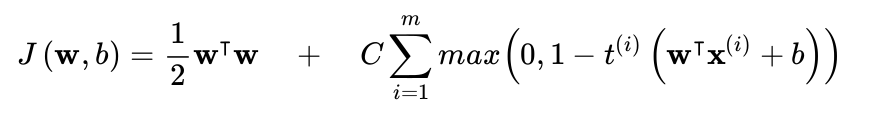

In [ ]:
def svm_train(X, Y, epochs = 1000, learning_rate = 1):
  w = np.zeros(len(X[0]))
  #W_exp = np.zeros(len(X[0]))
  for epoch in range(1, epochs):
    #error = 0
    #score_ = accuracy_score(Y, np.sign(np.dot(X, W_exp)))
    #if (score_ < 0.90):
    #  W_exp = W_exp + learning_rate * ((X[i]*Y[i]) + (-2 * (1/1000) *  W_exp))
    #else:
    #  W_exp = W_exp + learning_rate * (-2 * (1/1000) * W_exp)
    
    for i, x in enumerate(X):
      if(Y[i] * np.dot(X[i], w)) < 1:
        w = w + learning_rate * ((X[i]*Y[i]) + (-2 * (1/1000) *  w))
      else:
        w = w + learning_rate * (-2 * (1/1000) * w)

  return w

In [ ]:
XSVM = pd.read_csv('xtrain.csv')
XSVM = XSVM.assign(B = -1)
XSVM = XSVM.values
XSVM[0]

array([ 1.        ,  0.14634146,  0.5       ,  0.        ,  0.        ,
        0.        ,  0.        , -1.        ])

In [ ]:
YSVM = pd.read_csv('ytrain.csv')
YSVM['gender']=YSVM['gender'].map({1:1, 0: -1})
YSVM = YSVM.values
YSVM = YSVM.reshape(XSVM.shape[0], 1)
YSVM[0]

array([1])

In [ ]:
w = np.zeros(8)
print(XSVM.shape)
print(w.shape)
np.dot(XSVM, w).shape

(3500, 8)
(8,)


(3500,)

In [ ]:
WWW = np.zeros(len(XSVM[0]))
WWW.shape

(8,)

In [ ]:
WWW = svm_train(XSVM, YSVM)

In [ ]:
WWW

array([ 1.23519549, -2.46612794, -0.82263687, -4.27439157, -3.2016361 ,
       -2.54648441, -4.53285119, -5.49505834])

In [189]:
YSVM_test = pd.read_csv('yvalidate.csv')
YSVM_test['gender']=YSVM_test['gender'].map({1:1, 0: -1})
XSVM_test = pd.read_csv('xvalidate.csv')

In [190]:
XSVM_test = XSVM_test.values
XSVM_test.shape
YSVM_test = YSVM_test.values
YSVM_test = YSVM_test.reshape(XSVM_test.shape[0], 1)

In [191]:
error = 0
y_predicted = []
for i, x in enumerate(XSVM_test):
  prediction = np.sign(np.dot(x, WWW[:-1]) - WWW[-1:])
  y_predicted.append(prediction)
  if np.sign(np.dot(x, WWW[:-1]) - WWW[-1:]) != np.sign(YSVM_test[i]):
    error += 1
print(error)

44


In [192]:
YSVM_test.shape

(1005, 1)

In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
confusion_matrix(YSVM_test, y_predicted)

array([[480,   3],
       [ 41, 481]])

In [196]:
accuracy_score(YSVM_test, y_predicted)

0.9562189054726368